In [1]:
import pandas as pd
from pandas.plotting import lag_plot


import numpy as np
import os

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AR, ARResults


%matplotlib inline



In [2]:
# create the path for the file

myPath = os.path.join('/Users', 'Bryan', 'Documents', 'Programming',
                      'time_series_forecasting_with_python',
                      'UDEMY_TSA_FINAL','Data')

print(myPath)

os.chdir(myPath)

/Users/Bryan/Documents/Programming/time_series_forecasting_with_python/UDEMY_TSA_FINAL/Data


In [3]:
df = pd.read_csv('uspopulation.csv', index_col='DATE', parse_dates=True)

In [4]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


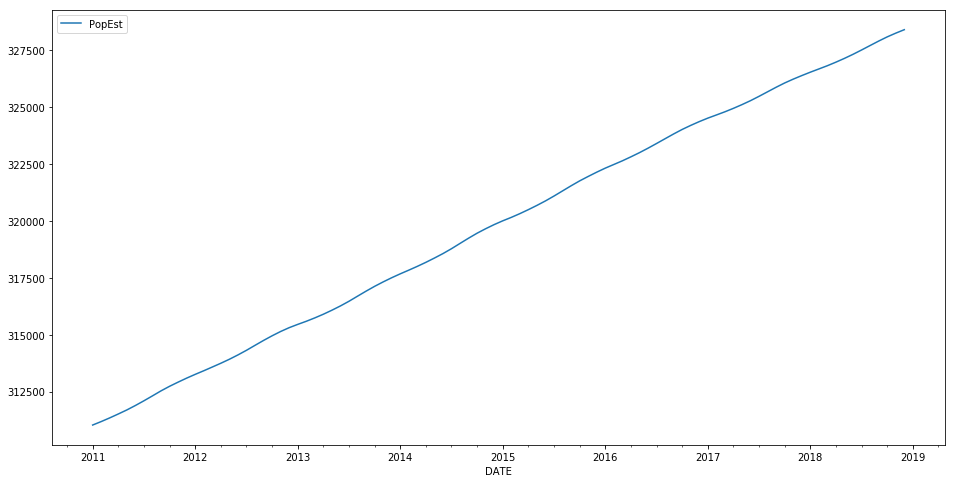

In [5]:
df.plot(figsize=(16,8))

In [6]:
len(df)

96

In [7]:
train = df.iloc[:84]

In [8]:
test = df.iloc[84:]

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
model = AR(train['PopEst'])

In [11]:
AR1fit = model.fit(maxlag=1)

In [12]:
AR1fit.params

const        284.913797
L1.PopEst      0.999686
dtype: float64

In [13]:
start = len(train)

In [14]:
end = len(train) + len(test) - 1

In [15]:
AR1fit.predict(start=start, end=end)

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, dtype: float64

In [16]:
test

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134
2018-06-01,327312
2018-07-01,327502
2018-08-01,327698
2018-09-01,327893


In [17]:
predictions1 = AR1fit.predict(start=start, end=end)
predictions1 = predictions1.rename('AR(1) Predictions')

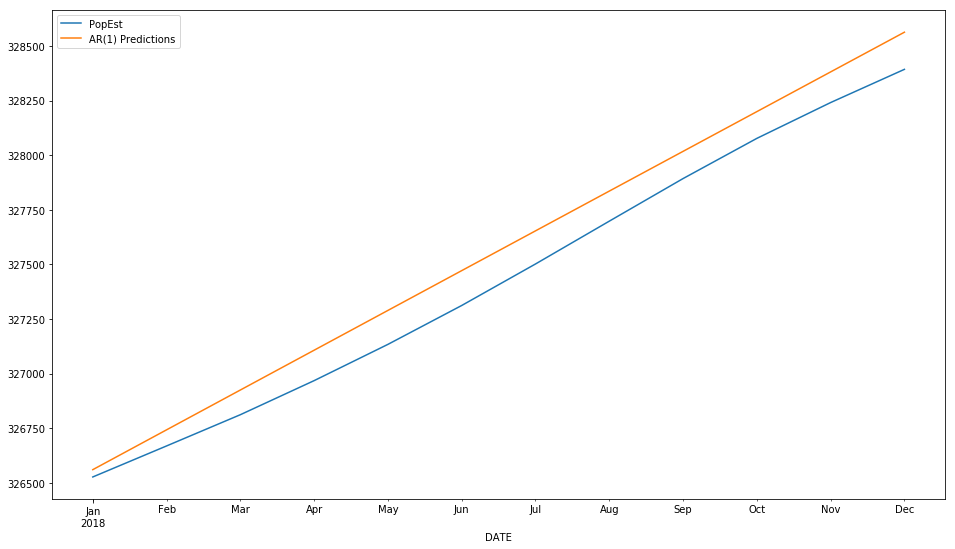

In [26]:
test.plot(figsize=(16,9), legend=True)
predictions1.plot(legend=True)

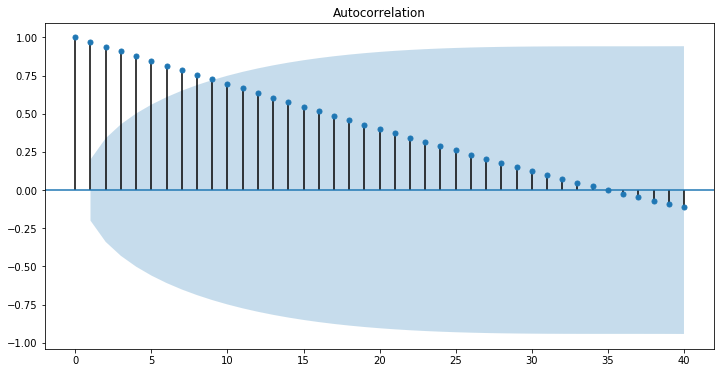

In [27]:
N, M = 12, 6
fig, ax = plt.subplots(figsize=(N, M))
plot_acf(df['PopEst'], lags=40, ax=ax)
plt.show()

In [28]:
AR2fit = model.fit(maxlag = 2)

In [29]:
AR2fit.params

const        137.368305
L1.PopEst      1.853490
L2.PopEst     -0.853836
dtype: float64

In [30]:
predictions2 = AR2fit.predict(start,end)

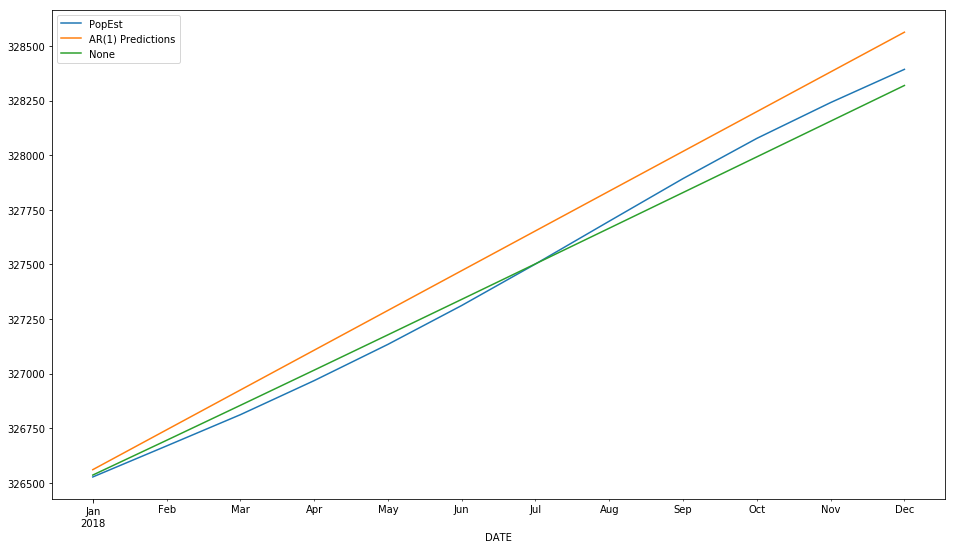

In [31]:
test.plot(figsize=(16,9), legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)

In [32]:
ARfit = model.fit(ic='t-stat')

In [33]:
ARfit.params

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64

In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
labels = ['AR1', 'AR2', 'AR8']

In [37]:
predictions8 = ARfit.predict(start=start, end=end)
predictions8 = predictions8.rename('AR(8) Predictions')

In [38]:
preds = [predictions1, predictions2, predictions8]

In [39]:
for i in range(3):
    error = mean_squared_error(test['PopEst'], preds[i])
    print(f'{labels[i]} MSE was: {error}')

AR1 MSE was: 17449.714238316246
AR2 MSE was: 2713.258660776706
AR8 MSE was: 186.97397279687456


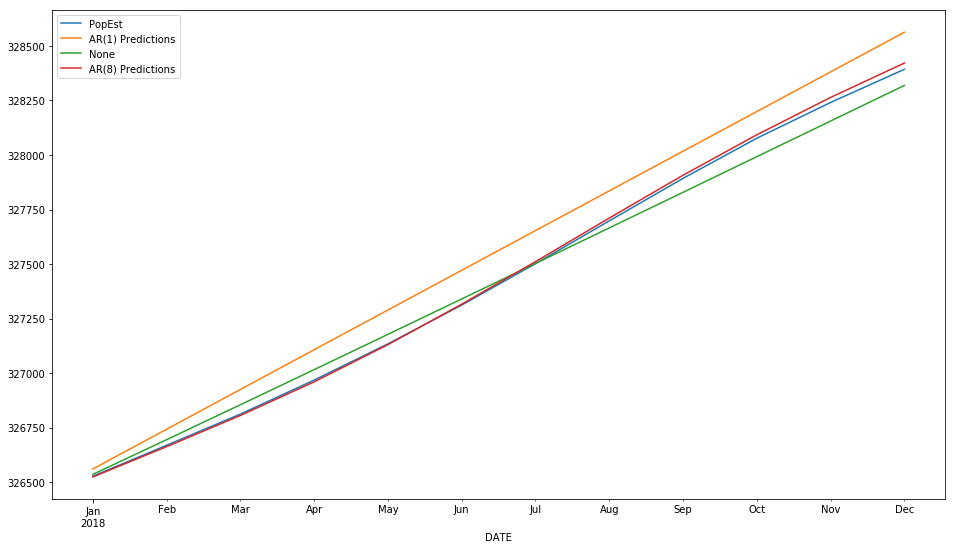

In [40]:
test.plot(figsize=(16,9), legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions8.plot(legend=True)

In [46]:
# FORECASTING

model = AR(df['PopEst'])

ARfit = model.fit()

forecasted_values = ARfit.predict(start=len(df)-1, end=len(df)+ 12).rename('Forecast')

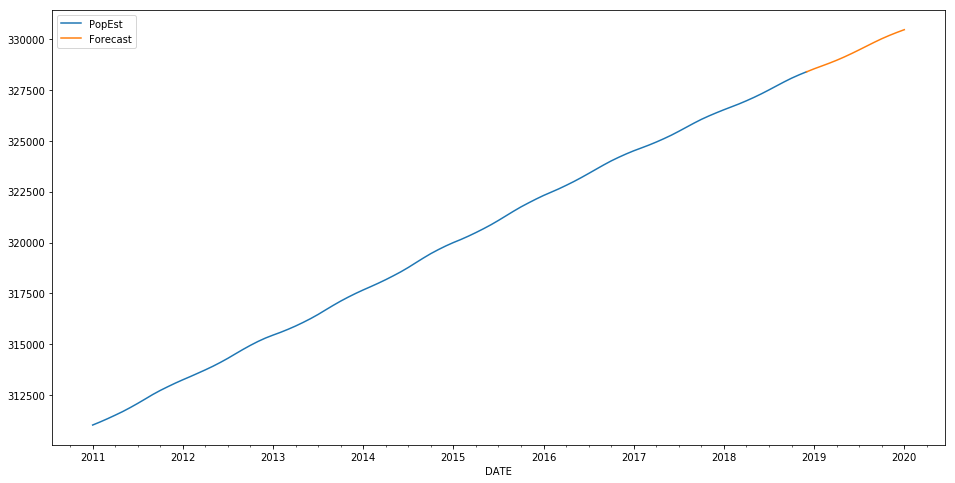

In [47]:
df['PopEst'].plot(figsize=(16,8), legend=True)
forecasted_values.plot(legend=True)